In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/dataset - netflix1.csv')

In [8]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Checking missing values

In [9]:
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [10]:
duplicate_rows = df.duplicated()

In [11]:
print(df[duplicate_rows])

Empty DataFrame
Columns: [show_id, type, title, director, country, date_added, release_year, rating, duration, listed_in]
Index: []


In [12]:
# Calculate the IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Filter out rows with outliers in specific columns
filtered_data = df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

# Display the cleaned data
print(filtered_data)

     show_id     type                             title         director  \
0         s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1         s3  TV Show                         Ganglands  Julien Leclercq   
2         s6  TV Show                     Midnight Mass    Mike Flanagan   
3        s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
5         s9  TV Show     The Great British Baking Show  Andy Devonshire   
...      ...      ...                               ...              ...   
8785   s8797  TV Show                        Yunus Emre        Not Given   
8786   s8798  TV Show                         Zak Storm        Not Given   
8787   s8801  TV Show                Zindagi Gulzar Hai        Not Given   
8788   s8784  TV Show                              Yoko        Not Given   
8789   s8786  TV Show                               YOM        Not Given   

             country  date_added  release_year rating   duration  \
0      United State

<ipython-input-12-fda0c6c422c4>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-12-fda0c6c422c4>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-12-fda0c6c422c4>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtered_data = df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]


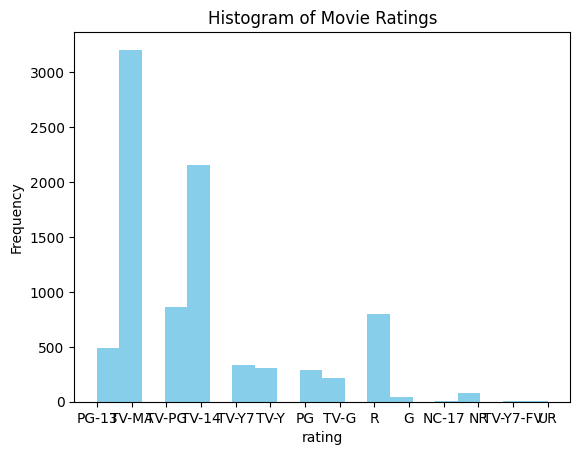

In [16]:
# Plot a histogram of a numerical column
plt.hist(df['rating'], bins=20, color='skyblue')
plt.xlabel('rating')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Ratings')
plt.show()

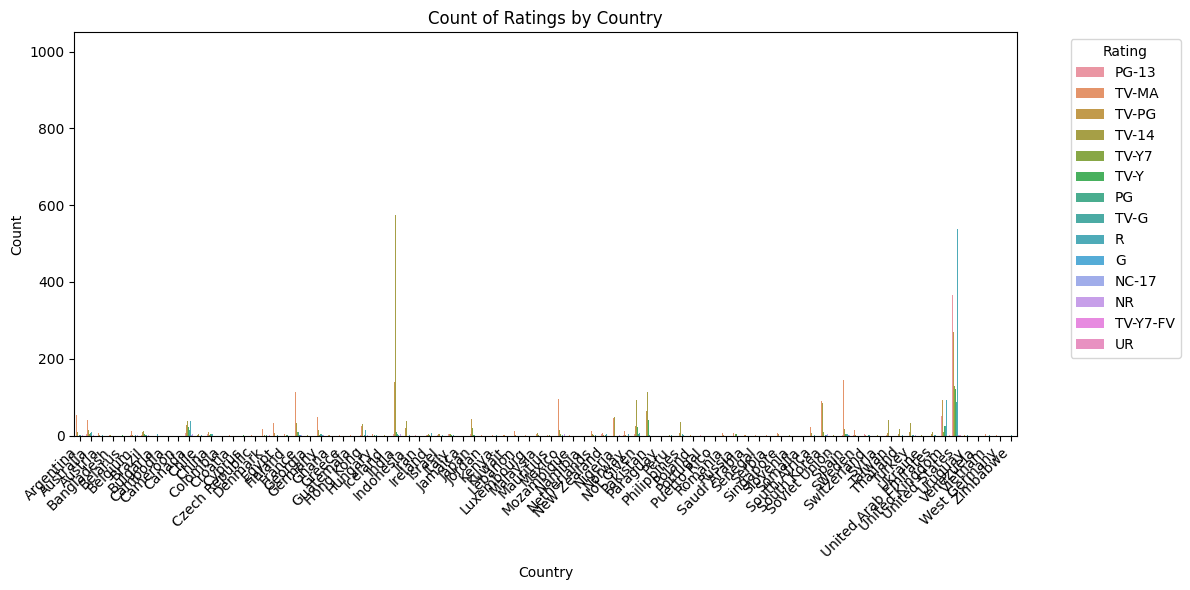

In [20]:
df['country'] = pd.Categorical(df['country'])

# Create a count plot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(df, x='country', hue='rating')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Ratings by Country')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Filter the data for entries from India
india_data = df[df['country'] == 'India']

# Find the movie with the maximum rating in India
max_rating_movie = india_data[india_data['rating'] == india_data['rating'].max()]

print("Movie with the maximum rating from India:")
print(max_rating_movie[['title', 'rating']])

Movie with the maximum rating from India:
                          title    rating
5497  Motu Patlu: King of Kings  TV-Y7-FV


In [31]:
# Filter the data for entries from India
US_movies = df[df['country'] == 'United States']

# Extract genres for Indian movies
US_genres = US_movies['listed_in']

# Count occurrences of each genre
genre_counts = US_genres.str.split(', ').explode().value_counts()

# Find the genre with the maximum count
max_genre = genre_counts.idxmax()

print("Maximum genre in US movies:", max_genre)

Maximum genre in US movies: Dramas


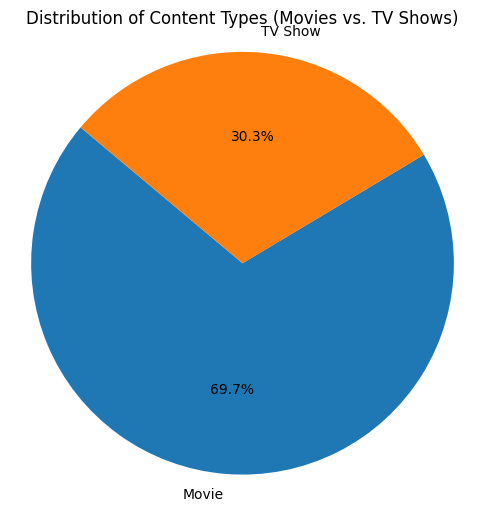

In [33]:
# Count the occurrences of each content type
content_type_counts = df['type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types (Movies vs. TV Shows)')
plt.axis('equal')
plt.show()

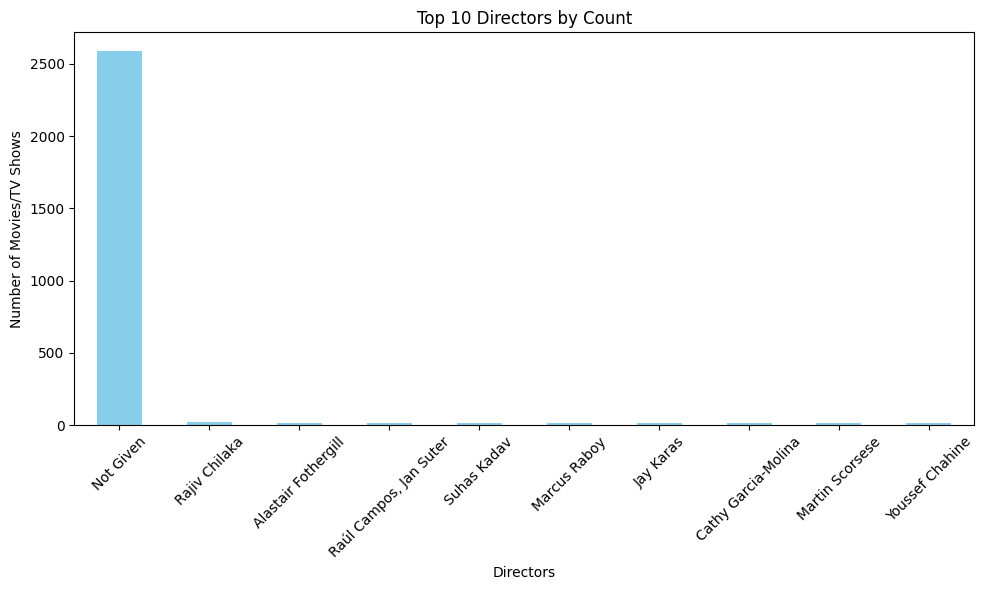

In [35]:
top_directors = df['director'].value_counts().head(10)

# Plotting a bar chart
plt.figure(figsize=(10, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.xlabel('Directors')
plt.ylabel('Number of Movies/TV Shows')
plt.title('Top 10 Directors by Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

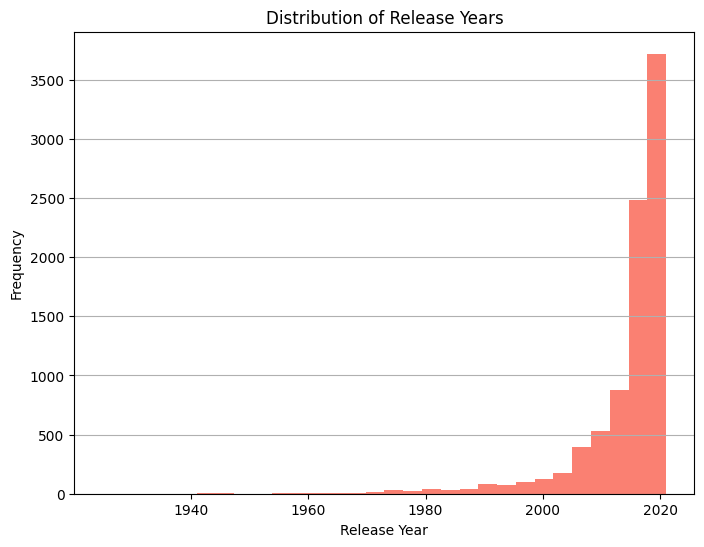

In [36]:
# Plotting a histogram of release years
plt.figure(figsize=(8, 6))
plt.hist(df['release_year'], bins=30, color='salmon')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.grid(axis='y')
plt.show()

In [48]:
import plotly.express as px

# This line filters the netflix_data DataFrame to include only rows where the 'type' column is either 'Movie' or 'TV Show', creating a new DataFrame named movies_tv_shows.
movies_tv_shows = df[df['type'].isin(['Movie', 'TV Show'])]

# From the filtered movies_tv_shows DataFrame, this line further filters the data to include only rows where the 'type' column is 'Movie', creating a new DataFrame named movies_data containing only movies.
movies_data = movies_tv_shows[movies_tv_shows['type'] == 'Movie']
movies_pivot = movies_data.groupby(['listed_in', 'release_year']).size().unstack(fill_value=0)

#  creates a pivot table movies_pivot from the movies_data DataFrame. It groups the data by 'listed_in' categories and 'release_year' and calculates the count of occurrences. The .size().unstack(fill_value=0) operation reshapes the data into a pivot table format with 'listed_in' categories as rows, 'release_year' as columns, and counts as values. It fills any missing values with 0.
tv_shows_data = movies_tv_shows[movies_tv_shows['type'] == 'TV Show']
tv_shows_pivot = tv_shows_data.groupby(['listed_in', 'release_year']).size().unstack(fill_value=0)

# Create a heatmap using Plotly for Movies
fig_movies = px.imshow(movies_pivot, labels=dict(color='Count'), x=movies_pivot.columns, y=movies_pivot.index)
fig_movies.update_layout(
    title='Count of Movies by Listed Category and Release Year',
    xaxis_title='Release Year',
    yaxis_title='Listed In'
)
fig_movies.show()

